In [181]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [182]:
file_dir = '../IPP_points/'

In [207]:
#prev = pd.DataFrame(columns=[0,1,2])
full_ls = []
keep_all = False
threshold = 16
for fname in os.listdir(file_dir):
    file = os.path.join(file_dir, fname)
    df = pd.read_csv(file, header=None)
    df[2] = int(fname.split('.')[0].split('_')[1])
    for (x, y, t) in df.values:
        t = int(t)
        if keep_all: full_ls.append((x, y, t))
        else:
            throw_away = False
            for (x1, y1, t1) in full_ls:
                if np.sqrt((x1-x)**2 + (y1-y)**2) < threshold:
                    throw_away = True
            if throw_away == False:
                full_ls.append((x, y, t))
    #
    #prev = pd.concat([prev, df])
    
points = pd.DataFrame(full_ls)

In [208]:
len(points)

31

In [209]:
points.to_csv('../points.csv', index=None,header=None)
points[2] = ['Species-' + str(x) for x in points[2]]

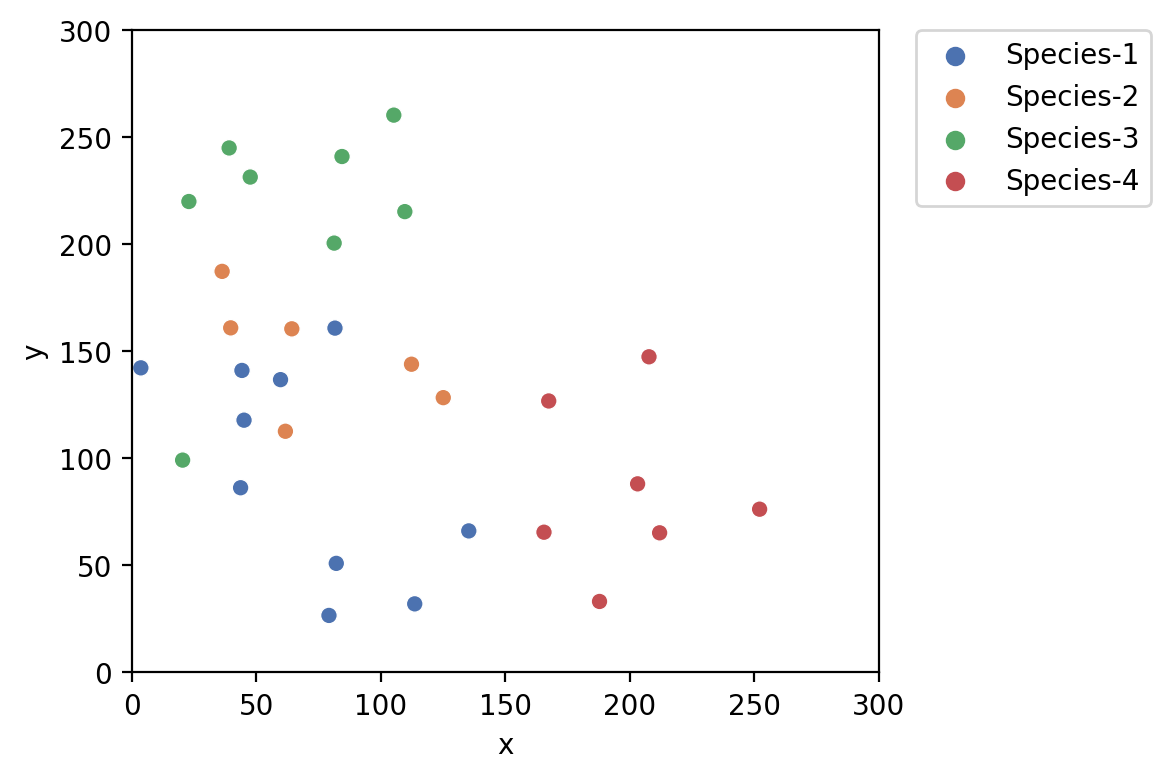

In [212]:
fig, ax = plt.subplots(1, 1, dpi=200)
sns.scatterplot(data=points,x=0,y=1,hue=2,palette="deep", ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, 300)
ax.set_ylim(0, 300)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
fig.savefig('../tree_placement.png')

In [211]:
prev

,0,1,2
0,14.7270,13.3180,Species-1
1,17.1250,18.5920,Species-1
2,16.7730,13.0250,Species-1
3,19.4100,16.2910,Species-1
4,19.2140,20.1550,Species-1
5,31.6380,8.8557,Species-1
0,26.3660,26.2090,Species-2
1,15.0250,16.7590,Species-2
2,20.9480,27.1150,Species-2
3,13.9110,28.4350,Species-2


In [56]:
#prev = prev.sample(frac=1)
#prev[2][0:20].value_counts()

In [58]:
prev = pd.read_csv('../points.csv')

In [59]:
prev

,0,1,2
0,5.8013,5.8900,1
1,5.8764,4.5627,1
2,6.7487,3.5100,1
3,6.9273,5.1138,1
4,6.3711,3.3247,1
5,5.0304,3.8884,1
6,6.3161,6.8264,2
7,5.8005,8.8422,2
8,6.3509,7.7501,2
9,5.7994,3.8524,2


<AxesSubplot:xlabel='0', ylabel='1'>

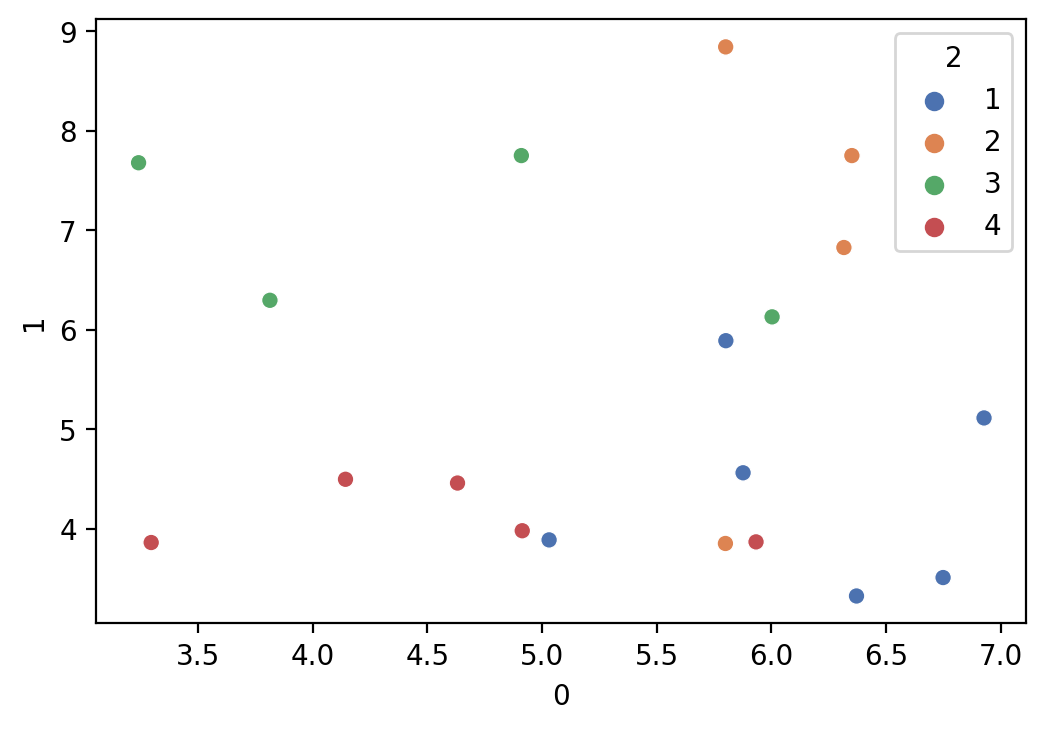

<AxesSubplot:xlabel='0', ylabel='1'>

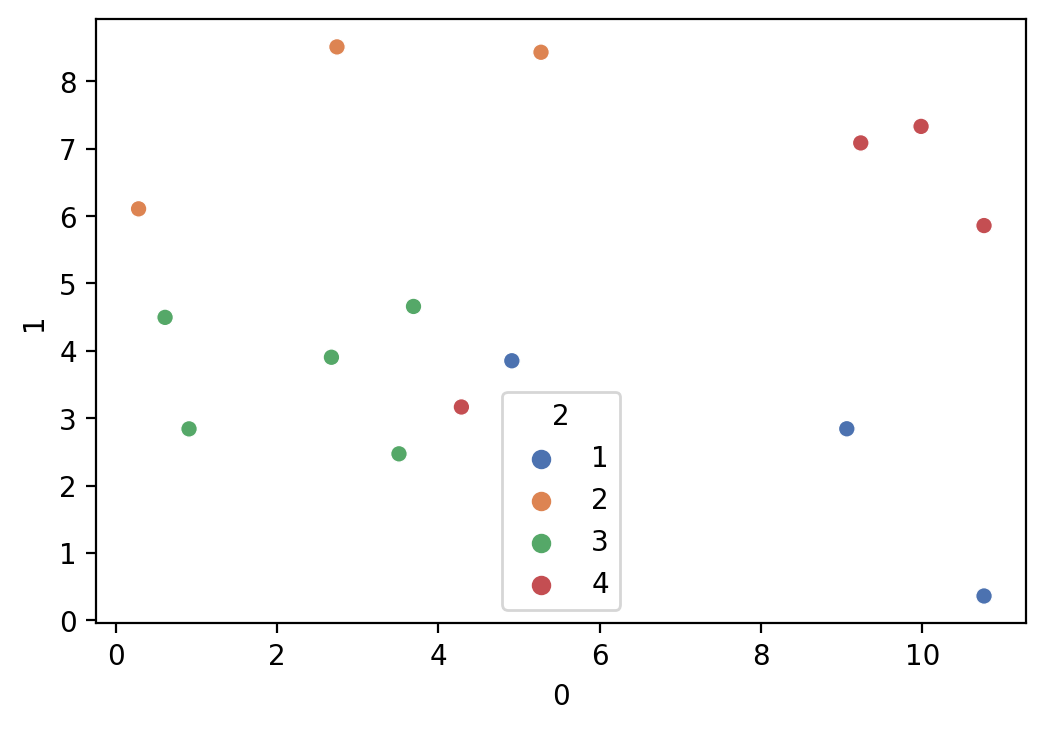

In [60]:
fig, ax = plt.subplots(1, 1, dpi=200)
sns.scatterplot(data=prev[0:15],x=0,y=1,hue=2,palette="deep", ax=ax)

In [63]:
prev['2'].value_counts()

1    6
4    6
2    4
3    4
Name: 2, dtype: int64

0     1
1     1
2     1
3     1
4     1
5     1
6     2
7     2
8     2
9     2
10    3
11    3
12    3
13    3
14    4
15    4
16    4
17    4
18    4
19    4
Name: 2, dtype: int64